In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci
import tqdm
import sklearn as sk

image that has the correct ratio.
To create these figures, you must:
1. Ensure you can work with the event coordinates correctly. This includes
ensuring the shots are on the correct side of the rink (due to period changes, or
start on different sides during a game), as well as being able to map from
physical coordinates to pixel coordinates on the figure.
2. Compute aggregate statistics of shot locations across the entire league to
compute league average shot rate per hour. You can make a few simplifying
assumptions:
- You can assume all shots are even strength; this means you can simply
aggregate over all shots rather than having to figure out whether a shot
was an even strength shot or not (recall Q 4.2).
- You can assume each game lasts 60 minutes.
13

3. Group shots by team, and use the league average shot rate per hour computed
above to compute the excess shot rate per hour. You can choose to represent
this as either a raw difference in goals between the teams, or a percentage.
4. Make appropriate choices to bin your data when displaying it. You could also
consider using smoothing techniques to make your shot maps more readable. A
common strategy is to use kernel density estimation with a Gaussian kernel.


In [2]:
 #Let us look at our data 
df = pd.read_csv('all_shots_goals.csv')

In [3]:
print ( df.isna().any().sum())
df.head(10)


4


,game_id,season,game_time,period,period_time,event_type,team_id,team_name,coordinates_x,coordinates_y,shooter,goalie,shot_type,empty_net,strength,situation_code
0,2016020001,20162017,2016-10-12 23:00:00+00:00,1,01:11,shot,10,Maple Leafs,-77.0,5.0,Mitch Marner,Craig Anderson,wrist,False,Even Strength,1551
1,2016020001,20162017,2016-10-12 23:00:00+00:00,1,02:53,shot,9,Senators,86.0,13.0,Chris Kelly,Frederik Andersen,wrist,False,Even Strength,1551
2,2016020001,20162017,2016-10-12 23:00:00+00:00,1,04:01,shot,9,Senators,23.0,-38.0,Cody Ceci,Frederik Andersen,wrist,False,Even Strength,1551
3,2016020001,20162017,2016-10-12 23:00:00+00:00,1,04:46,shot,9,Senators,33.0,-15.0,Erik Karlsson,Frederik Andersen,slap,False,Even Strength,1551
4,2016020001,20162017,2016-10-12 23:00:00+00:00,1,06:46,shot,10,Maple Leafs,-34.0,28.0,Martin Marincin,Craig Anderson,wrist,False,Even Strength,1551
5,2016020001,20162017,2016-10-12 23:00:00+00:00,1,07:30,shot,10,Maple Leafs,-33.0,-17.0,Mitch Marner,Craig Anderson,wrist,False,Even Strength,1551
6,2016020001,20162017,2016-10-12 23:00:00+00:00,1,08:21,goal,10,Maple Leafs,-70.0,1.0,Auston Matthews,Craig Anderson,wrist,False,Even Strength,1551
7,2016020001,20162017,2016-10-12 23:00:00+00:00,1,08:29,shot,10,Maple Leafs,-45.0,-36.0,Matt Martin,Craig Anderson,wrist,False,Even Strength,1551
8,2016020001,20162017,2016-10-12 23:00:00+00:00,1,09:00,shot,9,Senators,33.0,-18.0,Erik Karlsson,Frederik Andersen,slap,False,Even Strength,1551
9,2016020001,20162017,2016-10-12 23:00:00+00:00,1,10:16,shot,9,Senators,34.0,20.0,Erik Karlsson,Frederik Andersen,wrist,False,Even Strength,1551


In [4]:
# Let us just get the seasons, team name,  the x_cord and the y_cord, gameid, the rest of the data dont seem too relevant for this task 
df_sub = df[['game_id',  'season', 'team_name', 'coordinates_x', 'coordinates_y']]
#df = df[df['season'] == 20182019]

df_sub = df_sub[df_sub['season'] == 20182019]
df_sub = df_sub.dropna()



In [5]:
df_league_stats =  df[['game_id',  'season', 'team_name', 'coordinates_x', 'coordinates_y']]

df_league_stats = df_league_stats.dropna()

In [6]:
kernel_arr = df[['coordinates_x', 'coordinates_y']].dropna()
kernel_arr['coordinates_x']  = kernel_arr['coordinates_x'].apply(abs)
kernel_arr = kernel_arr.to_numpy().T

In [7]:
kernel_league = sci.gaussian_kde(kernel_arr)


In [8]:
Lightning_data_r = df_sub[df_sub['team_name'] == 'Lightning']
Lightning_data = Lightning_data_r

In [9]:
Lightning_data['coordinates_x'] = Lightning_data_r['coordinates_x'].apply(abs)

C:\Users\salee\AppData\Local\Temp\ipykernel_16832\4184208260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lightning_data['coordinates_x'] = Lightning_data_r['coordinates_x'].apply(abs)


In [10]:
kernel_lightning = sci.gaussian_kde(Lightning_data[[ 'coordinates_x', 'coordinates_y']].dropna().to_numpy().T)

In [11]:
x_bins = np.arange(0, 101)        
y_bins = np.arange(-42.5, 43.5)   

grid = pd.DataFrame(
    np.nan,
    index=x_bins,
    columns=y_bins
)

In [12]:
number_of_games_league =  len (df_league_stats['game_id'])
number_of_games_lightning = len(Lightning_data_r['game_id'])


In [15]:
for i in x_bins:
    for j in y_bins:
        team_density   = kernel_lightning((i, j)) / number_of_games_lightning
        league_density = kernel_league((i, j)) / number_of_games_league
        diff = team_density - league_density
        grid[i,j] = diff 

ValueError: Length of values (1) does not match length of index (101)

In [ ]:
grid

<Axes: >

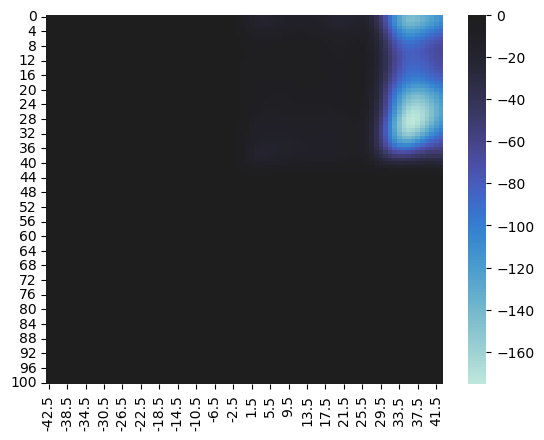

In [ ]:
sns.heatmap(grid, center=0, cm)